# The Spark Foundation #GRIPJUNE21

## Task 2 : Prediction using Unsupervised ML 

#### Diksha Indrajit Bhosale

Aim: From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

In [13]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from sklearn import datasets

In [15]:
# Load the Iris dataset 
iris = datasets.load_iris()

In [16]:
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [17]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Find the optimal number of clusters for k-mean

In [18]:
x = iris_df.iloc[:,[0,1,2,3]].values

In [19]:
from sklearn.cluster import KMeans

In [20]:
# finding the optional value of clusters
sse = []
k_range = range(1,10)
for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)
sse

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571815,
 46.44618205128205,
 39.03998724608725,
 34.43410591944288,
 29.98894395078606,
 28.506094205931667]

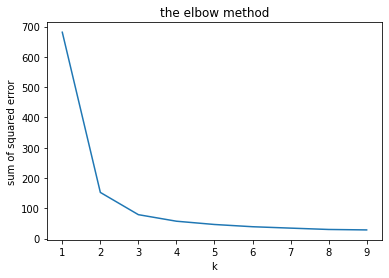

In [21]:
# Plotting the result onto graph
# this allows to observe 'the elbow'
plt.title('the elbow method')
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_range,sse)

### From the above graph we can clearly see that the optimal value of cluster for k-means is '3' as it is the point where 'the elbow' occur

## Fitting of model 

In [22]:
# Apply the k-means to the dataset with value of cluster is equal to 3
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(x)

In [23]:
y_pred = pd.DataFrame(y_pred)

In [24]:
y_pred.columns = ['predict']
y_pred.head()

,predict
0,1
1,1
2,1
3,1
4,1


In [25]:
y_pred['predict'].value_counts()

2    62
1    50
0    38
Name: predict, dtype: int64

In [26]:
iris_df['clusters'] = y_pred
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [27]:
df = iris_df.copy()

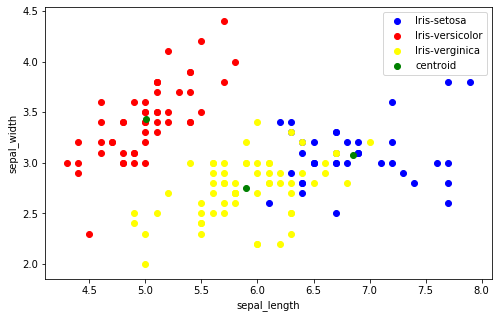

In [32]:
# Visualising the clusters on the first two columns
plt.figure(figsize=(8,5))
df1 = df[df['clusters']==0]
df2 = df[df['clusters']==1]
df3 = df[df['clusters']==2]
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',label='Iris-setosa')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',label='Iris-versicolor')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='yellow',label='Iris-verginica')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

# Plotting the centroid of the cluster
plt.scatter(km.cluster_centers_[:,[0]],km.cluster_centers_[:,[1]],color='green',label='centroid')
plt.legend()

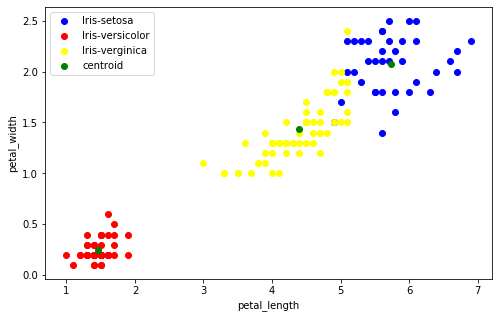

In [33]:
# Visualising the clusters on the last two columns
plt.figure(figsize=(8,5))
df1 = df[df['clusters']==0]
df2 = df[df['clusters']==1]
df3 = df[df['clusters']==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',label='Iris-setosa')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red',label='Iris-versicolor')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow',label='Iris-verginica')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

# Plotting the centroid of the cluster
plt.scatter(km.cluster_centers_[:,[2]],km.cluster_centers_[:,[3]],color='green',label='centroid')
plt.legend()